In [141]:
import pickle

import sympy as sp
from sympy import cos, sin
from IPython.display import display, Math
sp.init_printing()


Compute linearized dynamics of the system about an arbitrary state

Nonlinear dynamics


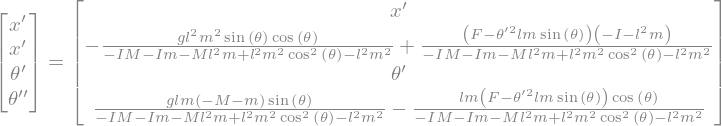

Linear dynamics


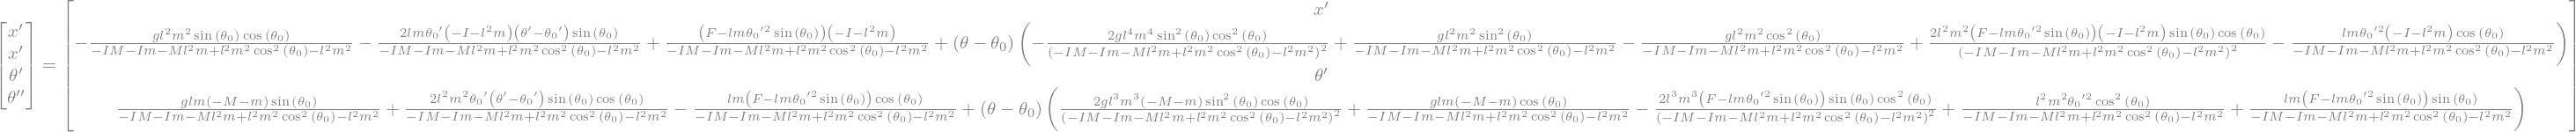

In [142]:
x, x_d, x_dd, th, th_d, th_dd = sp.symbols('x x\' x\' \\theta \\theta\' \\theta\'\'')   # x, x_dot, x_ddot, theta, theta_dot, theta_ddot
m, M , l, I, g, F = sp.symbols('m M l I g F')

# Nonlinear dynamics
A = sp.Matrix([
    [M + m,                  -l * m * cos(th)],
    [-l * m * cos(th),     m * l ** 2 + I]
])

b = sp.Matrix([
    -l * m * sin(th) * th_d ** 2 + F,
    g * l * m * sin(th)
])

# Build a full state vector
z = sp.Matrix([x, x_d, th, th_d])
z_d = sp.Matrix([x_d, x_dd, th_d, th_dd])

# Compute q = (x_ddot, th_ddot) = A^-1 * b
q = A.inv() * b

# dz/dt = f(z, t)
f = sp.Matrix([x_d, q[0], th_d, q[1]])
print('Nonlinear dynamics')
display(sp.Eq(z_d, f))


# Linearize the dynamics
x0, x0_d, th0, th0_d = sp.symbols('x_0 {x_0}\' \\theta_0 {\\theta_0}\'')    # state vector we want to linearize about
z0 = sp.Matrix([x0, x0_d, th0, th0_d])

# Formula for linearization for f(x) wrt. x
# f_lin(x) = f(x0) + f'(x0)(x - x0)
f_jacob = f.jacobian(z)
f_lin = f.subs(zip(z, z0)) + f_jacob.subs(zip(z, z0))*(z-z0)
print('Linear dynamics')
display(sp.Eq(z_d, f_lin))

Export the linearized dynamics so that we can use the expression in the simulation

In [ ]:
f_lin_func = sp.lambdify((M, m, l, I, g, F, *z, *z0), f_lin, 'numpy')
pkl_path = 'cart_pole/linearized_dynamics.pkl'
# with open(pkl_path, 'wb') as f:
#     pickle.dump(f_lin_func, f)
# Did not work to pickle the sympy lambda function, so we can dump the sympy object instead
# might have been for the better, as the function does not take any keyword arguments,
# making later use of it dependent ont the order I pass the variables to the lambdify function
with open(pkl_path, 'wb') as f:
    pickle.dump({"f_jacob": f_jacob, "f_lin": f_lin, "z": z, "z0": z0}, f)
f_lin_func

<function _lambdifygenerated(M, m, l, I, g, x, Dummy_147, Dummy_150, Dummy_149, x_0, _Dummy_145, Dummy_148, Dummy_146)>

Usually we will want to linearize about $\theta=0$ and $\dot{\theta}=0$ if we want to use the linearized dynamics for a regulator

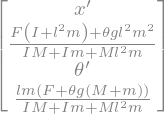

In [144]:
g = f_lin.subs([(th0, 0), (th0_d, 0)])
g.simplify()
# I think have misunderstood this I in the equations from Mathworks, equations only match when I set it to 0. TODO review this
g.subs([(I, 0)])
g

This lines up with the expression for the linearized dynamics found in other sources.
e.g. https://courses.ece.ucsb.edu/ECE594/594D_W10Byl/hw/cartpole_eom.pdf
This indicates that the expression for the linearized dynamics about any point probably is correct.